In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data  = pd.merge(mouse,clinical)

# Display the data table for preview
data.head()
# mouse.head()
# clinical.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
tumor = pd.DataFrame(tumor_mean)
# Preview DataFrame
tumor.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
tumor_sem = pd.DataFrame(tumor_sem)
# Preview DataFrame
tumor_sem.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformat_tumor_mean= tumor_mean.unstack(level=0)

# Preview threformat_tumor_mean['Capomulin']at Reformatting worked
reformat_tumor_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
f= reformat_tumor_sem= tumor_sem.unstack(level=0)
reformat_tumor_sem['Tumor Volume (mm3)']


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


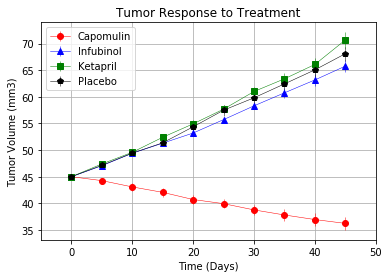

In [10]:
# Generate the Plot (with Error Bars)
x_axis=reformat_tumor_mean.index.values 
# plt.plot(x_axis,reformat[['Capomulin','Infubinol','Ketapril','Placebo']])
# plt.scatter(x_axis,reformat[['Capomulin','Infubinol','Ketapril','Placebo']])
plt.errorbar(x_axis,reformat_tumor_mean['Capomulin'],reformat_tumor_sem['Tumor Volume (mm3)']['Capomulin'],color='r',marker='o',linewidth=0.5)
plt.errorbar(x_axis,reformat_tumor_mean['Infubinol'],reformat_tumor_sem['Tumor Volume (mm3)']['Infubinol'],color='b',marker='^',linewidth=0.5)
plt.errorbar(x_axis,reformat_tumor_mean['Ketapril'],reformat_tumor_sem['Tumor Volume (mm3)']['Ketapril'],color='g',marker='s',linewidth=0.5)
plt.errorbar(x_axis,reformat_tumor_mean['Placebo'],reformat_tumor_sem['Tumor Volume (mm3)']['Placebo'],color='k',marker='p',linewidth=0.5)


plt.xlim(min(x_axis)-5, max(x_axis)+5)
plt.xlabel('Time (Days)')
plt.ylabel("Tumor Volume (mm3)")
plt.title('Tumor Response to Treatment')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'],loc='upperleft')
plt.grid()

# Save the Figure
plt.savefig("Tumor Response to Treatment.png")
plt.show()


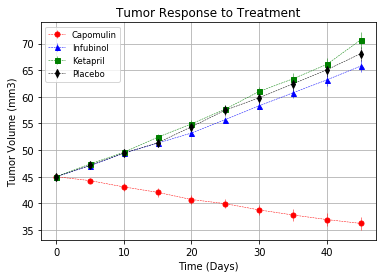

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [11]:
data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = data.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
meta_mean= pd.DataFrame(meta_mean)
# Preview DataFrame
meta_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem =data.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
meta_sem = pd.DataFrame(meta_sem)
# Preview DataFrame
meta_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [14]:
# Minor Data Munging to Re-Format the Data Frames
minor_meta_mean = meta_mean.unstack(level=0)
# Preview that Reformatting worked
minor_meta_mean.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [15]:
minor_meta_sem = meta_sem.unstack(level=0)
minor_meta_sem.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

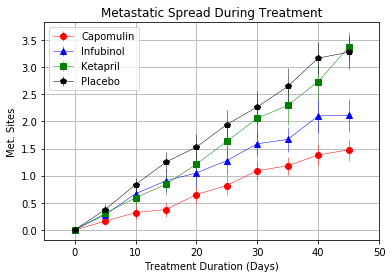

In [17]:
# Generate the Plot (with Error Bars)
x_axis=minor_meta_mean.index.values 
# plt.plot(x_axis,reformat[['Capomulin','Infubinol','Ketapril','Placebo']])
# plt.scatter(x_axis,reformat[['Capomulin','Infubinol','Ketapril','Placebo']])
plt.errorbar(x_axis,minor_meta_mean['Metastatic Sites']['Capomulin'],minor_meta_sem['Metastatic Sites']['Capomulin'],color='r',marker='o',linewidth=0.5)
plt.errorbar(x_axis,minor_meta_mean['Metastatic Sites']['Infubinol'],minor_meta_sem['Metastatic Sites']['Infubinol'],color='b',marker='^',linewidth=0.5)
plt.errorbar(x_axis,minor_meta_mean['Metastatic Sites']['Ketapril'],minor_meta_sem['Metastatic Sites']['Ketapril'],color='g',marker='s',linewidth=0.5)
plt.errorbar(x_axis,minor_meta_mean['Metastatic Sites']['Placebo'],minor_meta_sem['Metastatic Sites']['Placebo'],color='k',marker='p',linewidth=0.5)


plt.xlim(min(x_axis)-5, max(x_axis)+5)
plt.xlabel('Treatment Duration (Days)')
plt.ylabel("Met. Sites")
plt.title('Metastatic Spread During Treatment')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'],loc='upperleft')
plt.grid()

# Save the Figure
plt.savefig("Metastatic Spread During Treatment.png")

#Show the figure
plt.show()


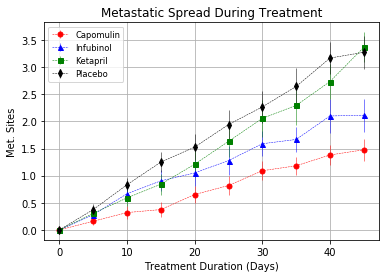

In [223]:
data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = data.groupby(['Drug','Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
mice_count = pd.DataFrame(mice_count)
mice_count.rename(columns={'Mouse ID': 'Mouse Count'}, inplace=True)
mice_sum = mice_count.sum()
# Preview DataFrame
mice_count.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [19]:
# Minor Data Munging to Re-Format the Data Frames
minor_mice_count = mice_count.unstack(level=0)
# Preview the Data Frame
minor_mice_count.head()

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


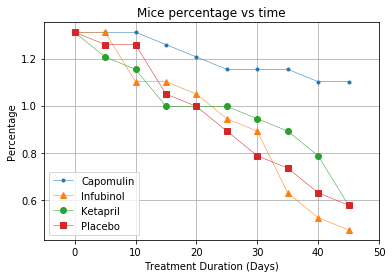

In [20]:
# Generate the Plot (Accounting for percentages)
percentage=(100*mice_count/mice_sum)
percentage = pd.DataFrame(percentage)
percentage = percentage.unstack(level=0)
(percentage['Mouse Count'][['Capomulin','Infubinol','Ketapril','Placebo']]).plot(style=['.-','^-','o-','s-'],linewidth=0.5)

plt.xlim(min(x_axis)-5, max(x_axis)+5)
plt.xlabel('Treatment Duration (Days)')
plt.ylabel("Percentage")
plt.title('Mice percentage vs time')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'],loc='upperleft')
plt.grid()
# Save the Figure
plt.savefig('Acconting for Percentage')
# Show the Figure
plt.show()

In [60]:
data.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Summary Bar Graph

In [70]:
# Calculate the percent changes for each drug
tumor_volume_mean = data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

# Display the data to confirm
tumor_volume_unstack = tumor_volume_sum.unstack(level=1)
tumor_volume_unstack


Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,45.0,44.266086,43.084291,42.064317,40.716325,39.939528,38.769339,37.816839,36.958001,36.236114
Ceftamin,45.0,46.503051,48.285125,50.094055,52.157049,54.287674,56.769517,58.827548,61.467895,64.132421
Infubinol,45.0,47.062001,49.403909,51.296397,53.197691,55.715252,58.299397,60.742461,63.162824,65.755562
Ketapril,45.0,47.389175,49.582269,52.399974,54.920935,57.678982,60.994507,63.371686,66.068580,70.662958
Naftisol,45.0,46.796098,48.694210,50.933018,53.644087,56.731968,59.559509,62.685087,65.600754,69.265506
Placebo,45.0,47.125589,49.423329,51.359742,54.364417,57.482574,59.809063,62.420615,65.052675,68.084082
Propriva,45.0,47.248967,49.101541,51.067318,53.346737,55.504138,58.196374,60.350199,63.045537,66.258529
Ramicane,45.0,43.944859,42.531957,41.495061,40.238325,38.974300,38.703137,37.451996,36.574081,34.955595
Stelasyn,45.0,47.527452,49.463844,51.529409,54.067395,56.166123,59.826738,62.440699,65.356386,68.438310


In [147]:
percentage = 100*((tumor_volume_unstack[45] - tumor_volume_unstack[0])/45)
percentage

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [152]:
percentage[['Capomulin','Infubinol','Ketapril','Placebo']]

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [240]:
np.sign(-11)

-1

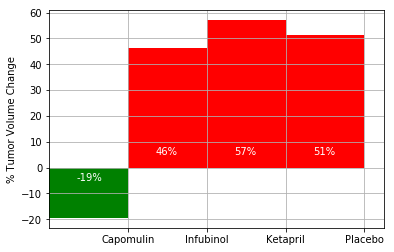

In [261]:
# Store all Relevant Percent Changes into a Tuple
percentage_1 = tuple(percentage)
percentage_list= percentage[['Capomulin','Infubinol','Ketapril','Placebo']].values
# Splice the data between passing and failing drugs
a=[]
for i in percentage_1:
    if i >0:
        a.append('Fail')
    else:
        a.append('Pass')
# Orient widths. Add labels, tick marks, etc. 
x_axis = np.arange(4)
plt.bar(x_axis,percentage_list,color=['g','r','r','r'],width=-1,align="edge")
ticks=['Capomulin','Infubinol','Ketapril','Placebo']
plt.xticks(np.arange(4),ticks)
plt.ylabel("% Tumor Volume Change")
plt.xlim(-1,3.25)
plt.grid()
# Use functions to label the percentages of changes
def percentage_label(label):
    for i in range(len(label)):
        plt.annotate(str(int(label[i]))+'%', xy=(0,0), color='w',xytext=(i-0.65, 5*np.sign(label[i])))


# Call functions to implement the function calls
percentage_label(percentage_list)

# Save the Figure

plt.savefig('Tumor_Percentage_change.png')
# Show the Figure
# fig.show()

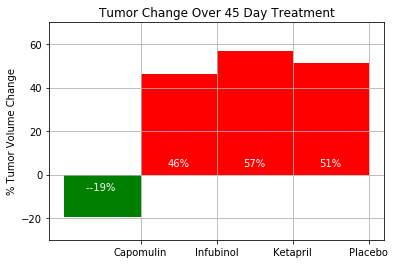